## Regularized logistic regression

you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or rejected.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load training data, the first two columns contains the exam score and the third column contains the label
train=pd.read_csv('ex2data2.txt', names=['test1','test2', 'result'])
print(train.head(2))
print(" ")
print(train.tail(2))
print(" ")
print(train.shape)

      test1    test2  result
0  0.051267  0.69956       1
1 -0.092742  0.68494       1
 
        test1     test2  result
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0
 
(118, 3)


In [49]:
y=train['result']
m=train.shape[0]

### Part I: Visualization: plot

we start by plotting the data we are working with

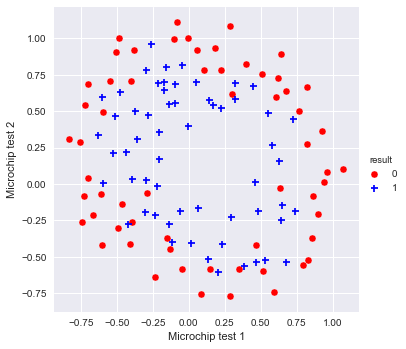

In [50]:
sns.pairplot(x_vars='test1', y_vars='test2', data=train, hue='result',size=5, markers=['o','+'], palette={1:'b',0:'r'})
plt.xlabel('Microchip test 1')
plt.ylabel("Microchip test 2")

### 2.1 Feature mapping

one way to fit the data better is to create more features from the data points.

In [51]:
#mapFeature, map the features into all polynomial terms of x1 and x2 up to the sixth power
def mapFeature(X1, X2):
    
    """
    MAPFEATURE Feature mapping function to polynomial features
    MAPFEATURE(X1, X2) maps the two input features to quadratic features used in the regularization exercise.
    eturns a new feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    degree = 6;
    out = pd.Series(np.ones(len(X1)))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out=pd.concat((out, X1**(i-j)*(X2**j)), axis=1)
    return out


In [53]:
X=mapFeature(train['test1'],train['test2'])
# features are 1, x1,x2,x1^2,x1x2, x2^2,x1^3....,x2^6
X.shape

(118, 28)

### 2.2 Cost function and gradient for regularized logistic regression

We will not regularize theta0

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """  

In [ ]:
def costFunction(theta, X, y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the parameter for logistic regression 
    and the gradient of the cost w.r.t. to the parameters.
    """

    # Initialize some useful values
    m = len(y)
    grad = np.zeros(len(theta))

# Compute the cost of a particular choice of theta. You should set J to the cost.
# Compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta
    J=(-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))))/m
    grad=X.T.dot((sigmoid(X.dot(theta))-np.array(y).reshape(m,1)))/m
    return (J,grad)

In [ ]:
def costFunctionReg(theta, X, y, lambda):

    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """
# Initialize some useful values
    m = len(y) 
    J = 0
    grad = np.zeros(len(theta))
    newtheta=theta.copy()
    newtheta[0]=0
    J=(-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))))/m+lambda*(theta*theta).sum()/2/m    
    grad=X.T.dot((sigmoid(X.dot(theta))-np.array(y).reshape(m,1)))/m+lambda/m*theta
    return J, grad